<h2>UNCC Fall 2019 Knowledge Discovery in Databases Course - Midterm</h2>


# Data Preprocessing (Midterm Part 1)

In order to achieve useful data mining the data preprocessing is an important step. Data preprocessing consists of:
* Data cleaning
* Data transformation

You will be working with the cereals dataset (in the exam folder).  This dataset contains nutrition information for 77 breakfast cereals and includes the following variables:
Cereal Name
Cereal Manufacturer
Type (hot or cold)
Calories per serving
Grams of Protein
Grams of fat
Milligrams of sodium
Grams of fiber
Grams of carbohydrates
Grams of sugars
Milligrams of potassium
Percentage of recommended daily allowance of vitamins (0%, 25% or 100%)
Weight of one serving
Number of cups per serving
Shelf location (1 = bottom, 2 = middle, 3 = top)
Nutritional rating, calculated by Consumer reports

The data set has some missing data.

We are going to clean the dataset and explore the data.

Follow the instructions below!  Questions are identified as QUESTION 1, QUESTION 2, etc.  Sometimes questions require a written response, most questions however require code.  You are not to receive any "human help"!  If you have a problem which seems to be an issue with your program or perhaps the question is ambiguous then please email or text Dr. Thompson and TA.  Good luck!

## TURN IN your zipped folder at the end with the notebook file and csv file - Individual Work Only is allowed.

In [58]:
#run this code to import the necessary libraries for your work
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
import sklearn
%matplotlib inline 
sns.set()

### QUESTION 1:  Write code in the cell to load the cereals csv file - name the file "cereals" (1 point)


In [59]:
#Question 1 answer here
cereals = pd.read_csv("cereals.csv")

### QUESTION 2:  Display the top 5 rows in cereals (1 point)


In [60]:
#Question 2 answer here
cereals.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


### QUESTION 3-A:  Display the structure of the dataframe. (1 point)


In [63]:
#Question 3-A answer here 
cereals.info()
#cereals.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
Name            77 non-null object
Manuf           77 non-null object
Type            77 non-null object
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           76 non-null float64
Sugars          76 non-null float64
Potass          75 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Rating          77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: float64(7), int64(13), object(3)
memory usage: 13.9+ KB


### QUESTION 3-B:  Display the description or summary of the count, mean, etc. for continuous variables (1 point)

In [65]:
#Question 3-B answer here
cereals.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705,0.961039,0.077922,0.103896,0.298701,0.285714,0.103896,0.012987
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289,0.194771,0.269807,0.307127,0.460690,0.454716,0.307127,0.113961
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### QUESTION 4:  Display the description of just the Name object variable (there are 3 - just show one) (1 point)

In [66]:
#Question 4 answer here
cereals['Name'].describe()

count                77
unique               77
top       Golden_Crisp 
freq                  1
Name: Name, dtype: object

### QUESTION 5:  Change the type of cereals.Name to category. (1 point)

In [67]:
#Question 5 answer here
cereals['Name'] = cereals.Name.astype('category')

### QUESTION 6:  Change the type of cereals.Manuf to category then show the categories (1 point)

In [69]:
#Question 6 answer here
cereals['Manuf'] = cereals.Manuf.astype('category')
#print(cereals['Manuf'])
print (cereals['Manuf'].cat.categories)

Index(['A ', 'G ', 'K ', 'N ', 'P ', 'Q ', 'R '], dtype='object')


### QUESTION 7:  Change the type of cereals.Type to category then show the categories (1 point)

In [70]:
#Question 7 answer here
cereals['Type'] = cereals.Type.astype('category')
#cereals['Type']
print (cereals['Type'].cat.categories)

Index(['C ', 'H '], dtype='object')


### QUESTION 8: Create a crosstab table to show number of manufacturers for each type of cereal (1 point)

In [71]:
#Question 8 answer here
pd.crosstab(cereals.Type, cereals.Manuf, margins=True)

Manuf,A,G,K,N,P,Q,R,All
Type,,,,,,,,
C,0,22,23,5,9,7,8,74
H,1,0,0,1,0,1,0,3
All,1,22,23,6,9,8,8,77


### QUESTION 9: Find the missing values. (1 point)

In [72]:
#Question 9 answer here
print(cereals.isnull())
print("Number of missing values:", cereals.isnull().sum())

     Name  Manuf   Type  Calories  Protein    Fat  Sodium  Fiber  Carbo  \
0   False  False  False     False    False  False   False  False  False   
1   False  False  False     False    False  False   False  False  False   
2   False  False  False     False    False  False   False  False  False   
3   False  False  False     False    False  False   False  False  False   
4   False  False  False     False    False  False   False  False  False   
5   False  False  False     False    False  False   False  False  False   
6   False  False  False     False    False  False   False  False  False   
7   False  False  False     False    False  False   False  False  False   
8   False  False  False     False    False  False   False  False  False   
9   False  False  False     False    False  False   False  False  False   
10  False  False  False     False    False  False   False  False  False   
11  False  False  False     False    False  False   False  False  False   
12  False  False  False  

<font size=3 color="green"> The values which are displayed as 'True' are missing values in those columns. Hence we observe that Carbo has 1 missing value, Sugars has 1 missing value and Potass has 2 missing values. The cereals.isnull().sum() function is proving the above observation.</font>

### QUESTION 10:  Replace the missing values in cereals in  the three columns with the mean of each column (1 point)



In [73]:
#Question 10 answer here
#Replacing the missing values with mean of each column
#cereals.fillna(cereals.mean())
cereals['Carbo'] = cereals['Carbo'].fillna(np.mean(cereals['Carbo']))
cereals['Sugars'] = cereals['Sugars'].fillna(np.mean(cereals['Sugars']))
cereals['Potass'] = cereals['Potass'].fillna(np.mean(cereals['Potass']))
#This is just to show that there are no missing values after replacing with mean
cereals.isnull().sum()

Name            0
Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           0
Sugars          0
Potass          0
Vitamins        0
Shelf           0
Weight          0
Cups            0
Rating          0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

### QUESTION 11:  Transform Calories, Fat, Fiber, Sugars and Rating numeric variables with min max transformation either using a function or using the MinMaxScaler from sklearn and place the resulting dataset into cereals_minmax, (be careful with the categorical variables (three of them) - they need to stay in the cereals_minmax dataset along with other variables) note:  if outliers are present min max will change high values to 1 and low values to 0 - remember for the future that this isn't always desirable!  (1 point)


In [13]:
#Question 11 answer here
from sklearn.preprocessing import MinMaxScaler
cereals_minmax = cereals.copy()
scaler = MinMaxScaler()
cereals_minmax[['Calories','Fat','Fiber','Sugars','Rating']] = scaler.fit_transform(cereals_minmax[['Calories','Fat','Fiber','Sugars','Rating']])
cereals_minmax

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,0.181818,4,0.2,130,0.714286,5.000000,0.400000,...,1.00,0.33,0.665593,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,0.636364,3,1.0,15,0.142857,8.000000,0.533333,...,1.00,1.00,0.210685,1,0,1,0,0,0,0
2,All-Bran,K,C,0.181818,4,0.2,260,0.642857,7.000000,0.333333,...,1.00,0.33,0.546941,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,0.000000,4,0.0,140,1.000000,8.000000,0.000000,...,1.00,0.50,1.000000,1,0,0,1,0,0,0
4,Almond_Delight,R,C,0.545455,2,0.4,200,0.071429,14.000000,0.533333,...,1.00,0.75,0.215987,1,0,0,0,0,1,0
5,Apple_Cinnamon_Cheerios,G,C,0.545455,2,0.4,180,0.107143,10.500000,0.666667,...,1.00,0.75,0.151551,1,0,0,0,1,0,0
6,Apple_Jacks,K,C,0.545455,2,0.0,125,0.071429,11.000000,0.933333,...,1.00,1.00,0.199985,1,0,0,1,0,0,0
7,Basic_4,G,C,0.727273,3,0.4,210,0.142857,18.000000,0.533333,...,1.33,0.75,0.251060,1,0,0,0,1,0,0
8,Bran_Chex,R,C,0.363636,2,0.2,200,0.285714,15.000000,0.400000,...,1.00,0.67,0.410740,1,0,0,0,0,1,0
9,Bran_Flakes,P,C,0.363636,3,0.0,210,0.357143,13.000000,0.333333,...,1.00,0.67,0.466164,1,0,0,0,0,0,0


## QUESTION 12 reducing skewness:  check Carbohydrates (Carbo) to see if the distribution is skewed.  Then transform using Square Root transformation (1 point)
.  


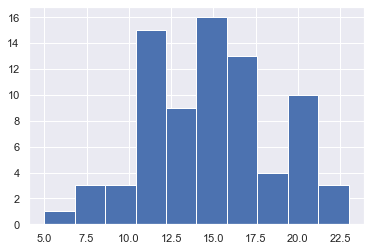

Mean: 14.80263157894737
Median 14.802631578947368
Skewness before transformation: 1.3819317676582276e-15


In [75]:
#Question 12 answer here
from matplotlib import pyplot
pyplot.hist(cereals.Carbo)
pyplot.show()
mean = np.mean(cereals_minmax.Carbo)
median = np.median(cereals_minmax.Carbo)
print("Mean:", mean)
print("Median", median)
std = np.std(cereals['Carbo'])
skewness= (3*(mean-median))/std
print("Skewness before transformation:",skewness)

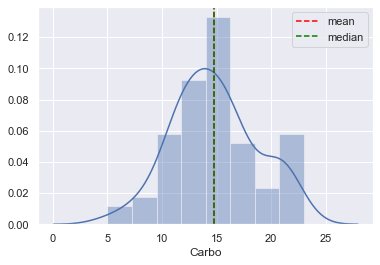

In [77]:
mean = np.nanmean(cereals["Carbo"])
median = np.nanmedian(cereals["Carbo"])
n_bins = np.sqrt(len(cereals_minmax.Carbo))
sns.distplot(cereals["Carbo"], bins= int(n_bins))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

<font size=3 color="green"> Histogram shows that Carbo is right-skewed. Also Mean is greater than Median. So Carbohydrates (Carbo) distribution is right-skewed. </font>

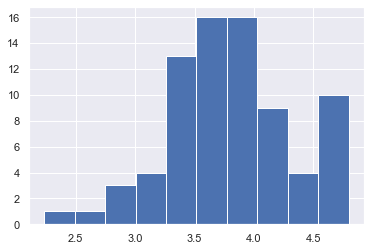

Mean after transformation 3.8130526941901546
Median after transformation 3.847418820319328
Skewness after transformation: -0.026735417330500166


In [79]:
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
import math
Carbo_sqrt = cereals['Carbo'].apply(lambda x: math.sqrt(x))
Carbo_sqrt_mean = Carbo_sqrt.mean()
Carbo_sqrt_median = Carbo_sqrt.median()
# histogram
pyplot.hist(Carbo_sqrt)
pyplot.show()
print("Mean after transformation", Carbo_sqrt_mean)
print("Median after transformation",Carbo_sqrt_median)
skw = 3*(Carbo_sqrt.mean()-Carbo_sqrt.median())/std
print("Skewness after transformation:", skw)



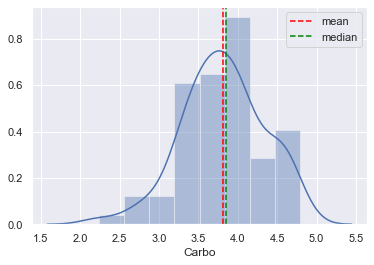

In [80]:
n_bins = np.sqrt(len(Carbo_sqrt))
sns.distplot(Carbo_sqrt, bins= int(n_bins))
plt.axvline(Carbo_sqrt_mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(Carbo_sqrt_median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

### You are finished with Part 1 Preprocessing. 

## Start of Part 2 - Data Exploration
### QUESTION 13:  Create a bar chart showing the count of Categorical variables Type and Manuf in cereals. (1 point)


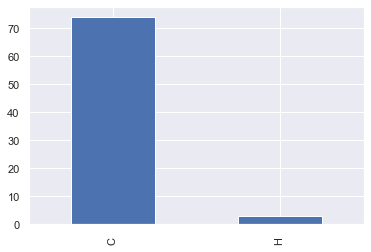

In [81]:
cereals['Type'].value_counts().plot(kind='bar')

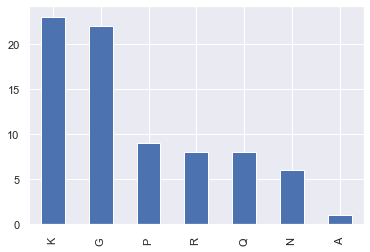

In [82]:
cereals['Manuf'].value_counts().plot(kind='bar')

### Question 14:  Plot and show histograms for each of the numerical variables in cereals. (1 point)


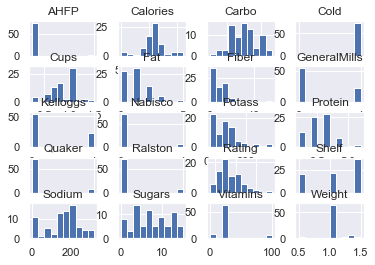

In [83]:
#Question 14 answer here
from matplotlib import pyplot
cereals.hist()
plt.show()

### Question 15:  Plot and show a Pairplot using "Manuf" as the hue.  This may take a few seconds to generate!  When it does, you can double click on the result to zoom in on the plots. (1 point)


C:\Users\SREE\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\SREE\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\SREE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SREE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


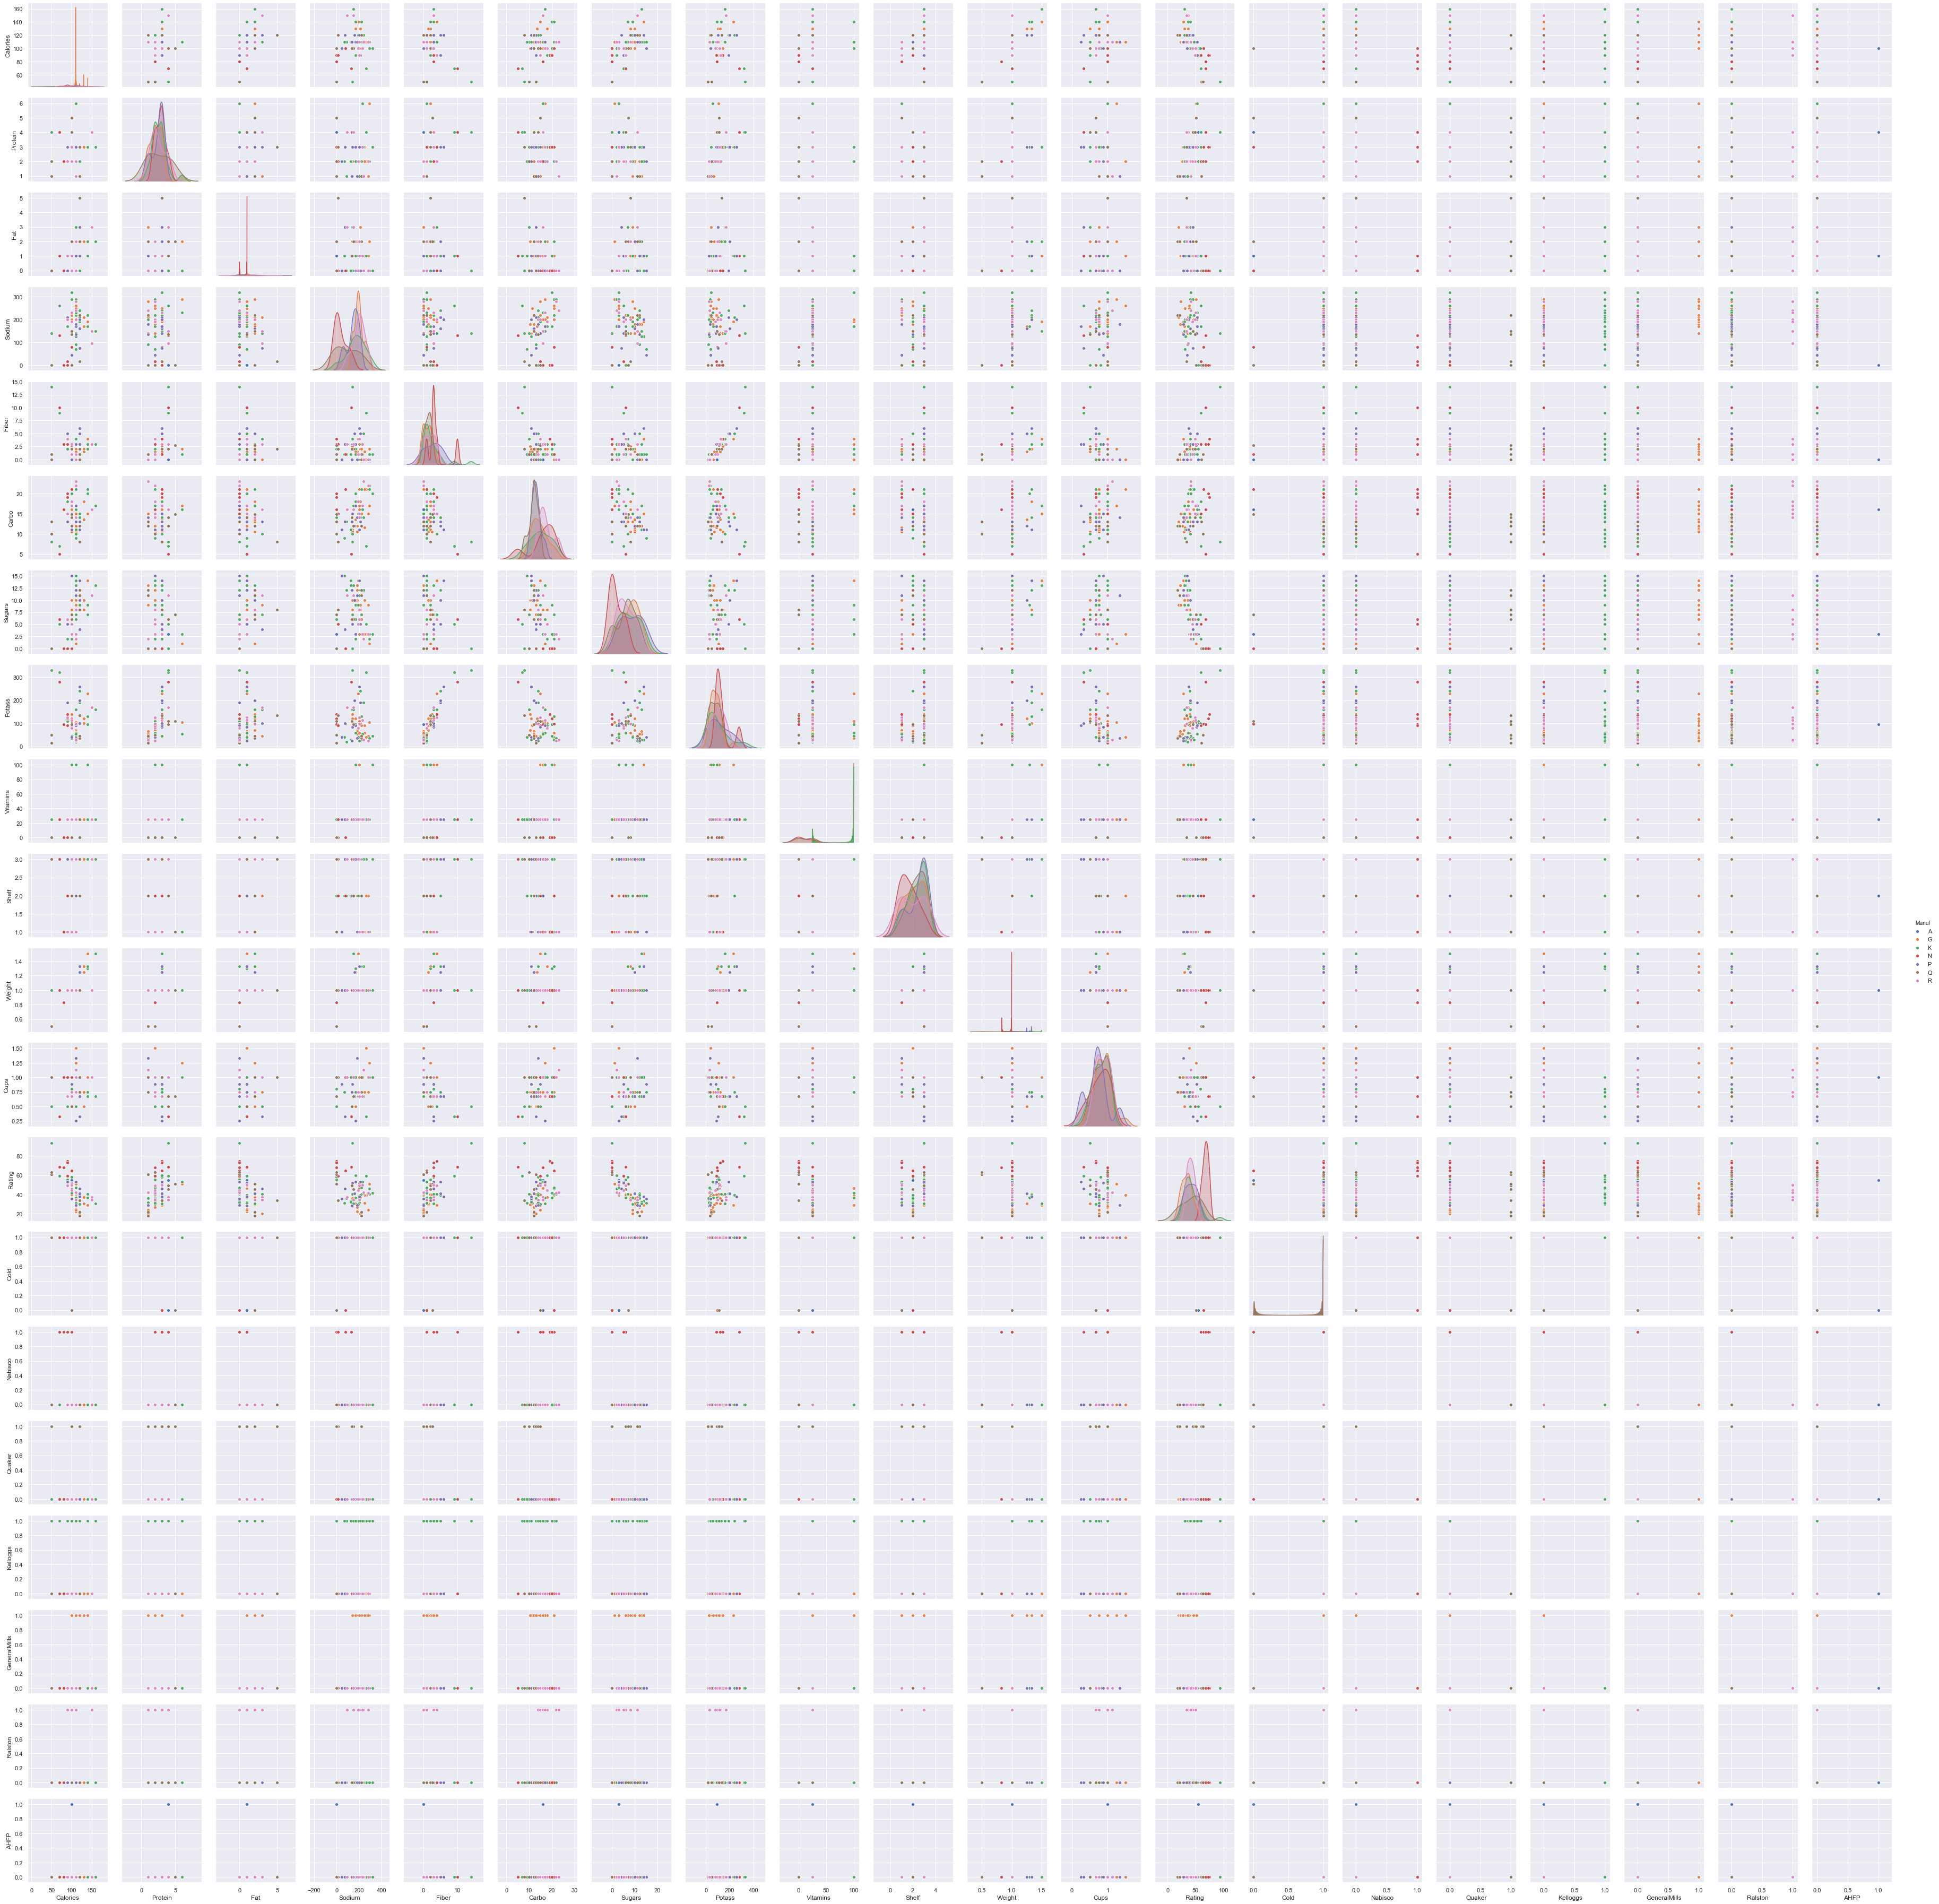

In [21]:
#Question 15 answer here
g = sns.pairplot(cereals, hue="Manuf")

### Question 16:  Show the pearson correlation coefficient matrix with the numeric variables.  Note:  there is no need to use standardized variables for calculating the correlation. (1 point)


In [85]:
cereals_numeric = cereals.select_dtypes(['number'])
cereals_coef = cereals_numeric.corr(method ='pearson')
cereals_coefmatrix = np.asmatrix(cereals_coef)
cereals_coefmatrix

matrix([[ 1.        ,  0.01906607,  0.49860981,  0.30064923, -0.29341275,
          0.25742343,  0.56606183, -0.07199148,  0.2653563 ,  0.09723437,
          0.69609108,  0.08719955, -0.68937603,  0.07159583, -0.30360516,
         -0.20902999,  0.06110986,  0.1463916 ,  0.14278005, -0.04078835],
        [ 0.01906607,  1.        ,  0.20843099, -0.05467435,  0.50033004,
         -0.0241598 , -0.28190527,  0.56214347,  0.00733537,  0.13386479,
          0.21615849, -0.24446916,  0.47061846, -0.269265  ,  0.07694209,
          0.02490254,  0.0640351 , -0.13215548, -0.01423002,  0.15340105],
        [ 0.49860981,  0.20843099,  1.        , -0.00540746,  0.01671924,
         -0.29807414,  0.3005521 ,  0.19782336, -0.03115627,  0.26369109,
          0.21462503, -0.17589214, -0.40928366,  0.00261511, -0.24604688,
          0.25097601, -0.26387493,  0.22178883,  0.08071035, -0.00148984],
        [ 0.30064923, -0.05467435, -0.00540746,  1.        , -0.07067501,
          0.29039928,  0.05742522, 

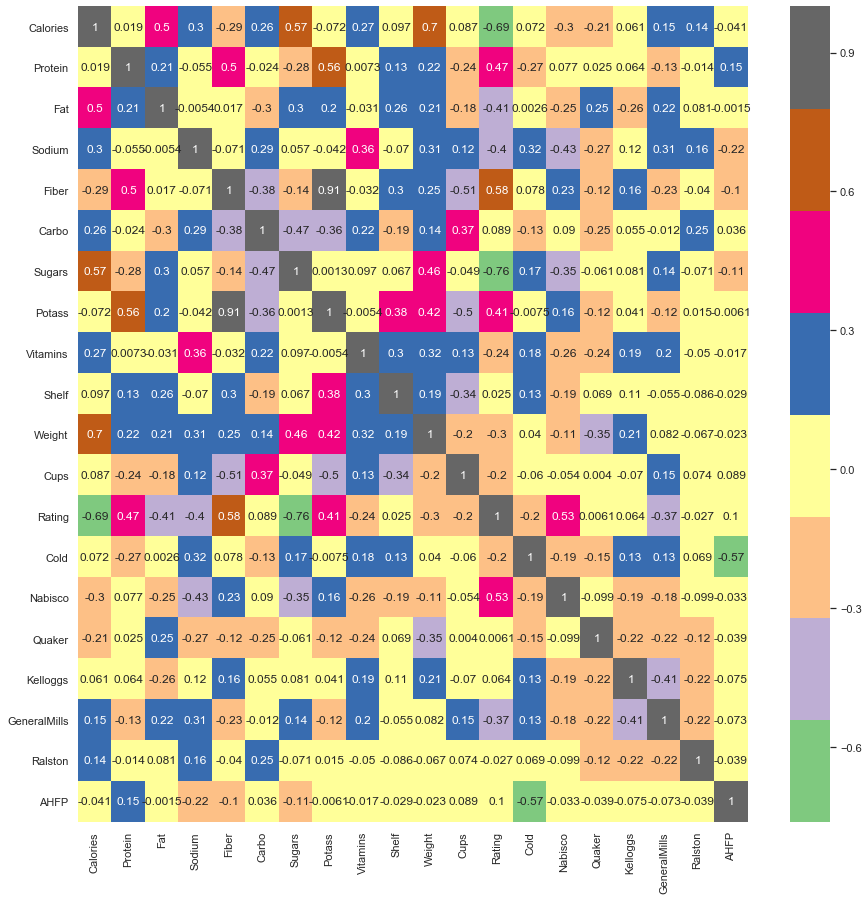

In [86]:
#This is just to refer the correlation coefficients properly in a heatmap
figure, cereals_helix = plt.subplots(figsize=(15,15))
sns.heatmap(cereals_coef,annot=True, cmap='Accent')

### Question 17:  Look at the results in your correlation matrix.  Which attribute has the highest correlation with Rating? What is the value?  Your answer:   (1 point)


###### Question 17 answer here
<font size=3 color="green"> Attribute 'Sugars' has highest negative correlation with 'Rating', the value is -0.76 and 'Fiber' has highest positive correlation with 'Rating', the value is 0.58 </font>

### Question 18:  Use binning to transform one of the continuous numerical features of your choice to five equal width bins.  (3 points)

### Turn in your work after completing this question.  Please save all work, then create a zipped folder and turn inthe zipped folder with your data file and the completed .ipynb file.

In [89]:
#Question 18 answer here
#I have used 'Calories' column to perform binning and transforming into five equal width bins.
#calculating width,min value and max values in 'Calories' column.
quantity = 5
Width = ((cereals['Calories'].max()-cereals['Calories'].min()) // quantity)
print("Width:", Width)
print("Lower_bound", cereals['Calories'].min())
print("Upper_bound", cereals['Calories'].max())

Width: 22
Lower_bound 50
Upper_bound 160


In [90]:
#To create bins
def create_bins(lower_bound, upper_bound, width, quantity):  
    bins = []
    for low in range(lower_bound, 
                     upper_bound, width):
        bins.append((low, low+width))
    return bins
bins = create_bins(lower_bound=50,upper_bound=160,
                   width=22,
                   quantity=5)
bins

[(50, 72), (72, 94), (94, 116), (116, 138), (138, 160)]

In [91]:
#Using binning to transform 'Calories' to five equal width bins
bin_ranges = [50, 72, 94, 116, 138, 160]
groups = ['very-low', 'low', 'normal', 'excess', 'over-abundant']
cereals['Calories_bin']= pd.cut(cereals['Calories'],bin_ranges, labels=groups)
cereals['Calories_bin']

0          very-low
1            excess
2          very-low
3               NaN
4            normal
5            normal
6            normal
7            excess
8               low
9               low
10           excess
11           normal
12           excess
13           normal
14           normal
15           normal
16           normal
17           normal
18           normal
19           normal
20           normal
21           normal
22           normal
23           normal
24           normal
25           normal
26           normal
27           excess
28           excess
29           normal
          ...      
47           normal
48           excess
49    over-abundant
50              low
51           excess
52           excess
53           normal
54              NaN
55              NaN
56           normal
57           normal
58           excess
59           normal
60              low
61           normal
62           normal
63              low
64              low
65              low
